# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from apiKey import weatherKey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [11]:
baseURL = f"http://api.openweathermap.org/data/2.5/weather?"
citiesTest = [cities[0],cities[1],cities[2],cities[3],cities[4]]
citiesTest
for city in citiesTest:
    response = requests.get(baseURL + "appid=" + weatherKey + "&q=" + city).json()
    print("---------------------------------")
    print("---------------------------------")
    pprint(response['name'])
    pprint(response['coord'])
    pprint(response['sys']['country'])
    print("---------------------------------")
    pprint('date:  '+str(response['dt']))
    pprint('humidity:  '+str(response['main']['humidity']))
    pprint('temp:  '+str(response['main']['temp']))
    pprint('clouds:  '+str(response['clouds']['all']))
    pprint('wind speed:  '+str(response['wind']['speed']))
    pprint('weather:  '+str(response['weather'][0]['main']))
    #pprint(response)
    print("---------------------------------\n\n")

---------------------------------
---------------------------------
'Labuhan'
{'lat': -2.54, 'lon': 115.51}
'ID'
---------------------------------
'date:  1570340473'
'humidity62'
'temp:  303.124'
'clouds:  60'
'wind speed:  2.07'
'weather:  Rain'
---------------------------------


---------------------------------
---------------------------------
'Calabozo'
{'lat': 8.92, 'lon': -67.43}
'VE'
---------------------------------
'date:  1570340473'
'humidity94'
'temp:  296.044'
'clouds:  26'
'wind speed:  1.04'
'weather:  Clouds'
---------------------------------


---------------------------------
---------------------------------
'Fortuna'
{'lat': 40.6, 'lon': -124.16}
'US'
---------------------------------
'date:  1570340249'
'humidity93'
'temp:  283.65'
'clouds:  1'
'wind speed:  3.1'
'weather:  Clear'
---------------------------------


---------------------------------
---------------------------------
'Atuona'
{'lat': -9.8, 'lon': -139.03}
'PF'
---------------------------------
'd

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
baseURL = f"http://api.openweathermap.org/data/2.5/weather?"
responseDict = {}

print(f"Beginning Data Retrieval")
print(f"------------------------------------------")
counter = 1
for city in cities:
    #try: 
        responseJSON = requests.get(baseURL + "appid=" + weatherKey + "&q=" + city+"&units=Imperial").json()
        if (responseJSON["cod"] == "404"):
            print(f"City: {city} was not found.  Skipping to next city.")
            
        else:
            responseDict.update({f"{city}":{'country':responseJSON['sys']['country'],
                                        'date':responseJSON['dt'],
                                        'lat':responseJSON['coord']['lat'],
                                        'long':responseJSON['coord']['lon'],
                                        'temp':responseJSON['main']['temp'],
                                        'humidity':responseJSON['main']['humidity'],
                                        'windSpeed':responseJSON['wind']['speed'],
                                        'weather':responseJSON['weather'][0]['main'],
                                        'cloudiness':responseJSON['clouds']['all']}})
            print(f"Processing Record {counter} | City:  {city}" )
            counter += 1 
            
    #except:
        #print(f"An exception has occurred")
        

print(f"------------------------------------------")
print(f"All Data Requests Complete")
print(f"total responses received:  {counter}")
print(f"------------------------------------------\n\n\n")

Beginning Data Retrieval
------------------------------------------
Processing Record 1 | City:  labuhan
Processing Record 2 | City:  calabozo
Processing Record 3 | City:  fortuna
Processing Record 4 | City:  atuona
Processing Record 5 | City:  rikitea
Processing Record 6 | City:  pevek
Processing Record 7 | City:  busselton
Processing Record 8 | City:  muisne
Processing Record 9 | City:  cape town
Processing Record 10 | City:  lompoc
Processing Record 11 | City:  airai
City: asau was not found.  Skipping to next city.
Processing Record 12 | City:  cidreira
Processing Record 13 | City:  paamiut
Processing Record 14 | City:  mirnyy
Processing Record 15 | City:  new norfolk
Processing Record 16 | City:  saint-philippe
Processing Record 17 | City:  bethel
Processing Record 18 | City:  beloha
Processing Record 19 | City:  bluff
Processing Record 20 | City:  butaritari
Processing Record 21 | City:  dikson
Processing Record 22 | City:  kudahuvadhoo
Processing Record 23 | City:  lorengau
Proc

Processing Record 183 | City:  kushima
Processing Record 184 | City:  ravar
Processing Record 185 | City:  invermere
Processing Record 186 | City:  pachino
Processing Record 187 | City:  nouakchott
Processing Record 188 | City:  artyom
Processing Record 189 | City:  tiksi
Processing Record 190 | City:  ahuimanu
City: mys shmidta was not found.  Skipping to next city.
Processing Record 191 | City:  barrow
Processing Record 192 | City:  dunmore east
Processing Record 193 | City:  chara
Processing Record 194 | City:  tasiilaq
Processing Record 195 | City:  ornskoldsvik
Processing Record 196 | City:  geraldton
Processing Record 197 | City:  pishva
Processing Record 198 | City:  uglovskoye
Processing Record 199 | City:  sibolga
Processing Record 200 | City:  saldanha
Processing Record 201 | City:  maragogi
Processing Record 202 | City:  sorong
Processing Record 203 | City:  wanaka
Processing Record 204 | City:  mackay
City: grand river south east was not found.  Skipping to next city.
City:

Processing Record 361 | City:  blackwater
Processing Record 362 | City:  elko
Processing Record 363 | City:  port macquarie
Processing Record 364 | City:  ust-maya
Processing Record 365 | City:  shache
Processing Record 366 | City:  leeton
City: mulatupo was not found.  Skipping to next city.
Processing Record 367 | City:  great yarmouth
Processing Record 368 | City:  mizdah
Processing Record 369 | City:  carutapera
Processing Record 370 | City:  jamame
Processing Record 371 | City:  clyde river
Processing Record 372 | City:  saint-joseph
Processing Record 373 | City:  paramonga
Processing Record 374 | City:  arlit
Processing Record 375 | City:  challans
Processing Record 376 | City:  kargasok
Processing Record 377 | City:  mahajanga
Processing Record 378 | City:  monte alegre
Processing Record 379 | City:  vila
Processing Record 380 | City:  cayenne
City: bayanga was not found.  Skipping to next city.
Processing Record 381 | City:  sambava
Processing Record 382 | City:  pitanga
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
citiesWeatherDF = pd.DataFrame.from_dict(responseDict, orient = 'index')
citiesWeatherDF.index.name = 'city'
citiesWeatherDF.head()

,country,date,lat,long,temp,humidity,windSpeed,weather,cloudiness
city,,,,,,,,,
labuhan,ID,1570343696,-2.54,115.51,85.95,62,4.63,Rain,60
calabozo,VE,1570343696,8.92,-67.43,73.21,94,2.32,Clouds,26
fortuna,US,1570343697,40.60,-124.16,49.73,87,4.70,Clear,1
atuona,PF,1570343697,-9.80,-139.03,79.89,72,16.24,Clear,0
rikitea,PF,1570343697,-23.12,-134.97,72.83,83,23.93,Rain,100


In [22]:
export_csv = citiesWeatherDF.to_csv (r'C:\Users\Owner\BootCampData\python-api-challenge\VacationPy\Output\export_dataframe.csv',
                                     index = True, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

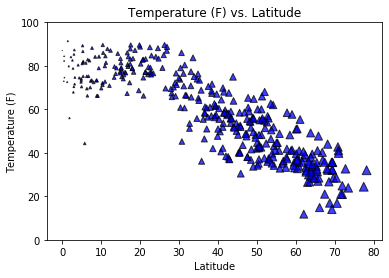

In [32]:
plt.scatter(citiesWeatherDF.lat, citiesWeatherDF.temp, marker="^", facecolors="blue", edgecolors="black",
            s=citiesWeatherDF.lat, alpha=0.75)
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.ylim(0,100)
plt.savefig(r'C:\Users\Owner\BootCampData\python-api-challenge\VacationPy\Output\LatvTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

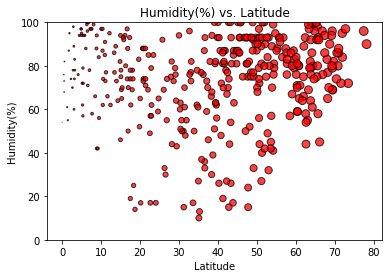

In [33]:
plt.scatter(citiesWeatherDF.lat, citiesWeatherDF.humidity, marker="o", facecolors="red", edgecolors="black",
            s=citiesWeatherDF.lat, alpha=0.75)
plt.title("Humidity(%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.ylim(0,100)
plt.savefig(r'C:\Users\Owner\BootCampData\python-api-challenge\VacationPy\Output\LatvHumidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

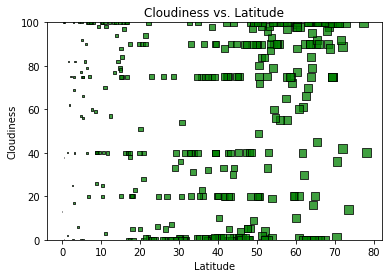

In [34]:
plt.scatter(citiesWeatherDF.lat, citiesWeatherDF.cloudiness, marker="s", facecolors="green", edgecolors="black",
            s=citiesWeatherDF.lat, alpha=0.75)
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(0,100)
plt.savefig(r'C:\Users\Owner\BootCampData\python-api-challenge\VacationPy\Output\LatvCloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

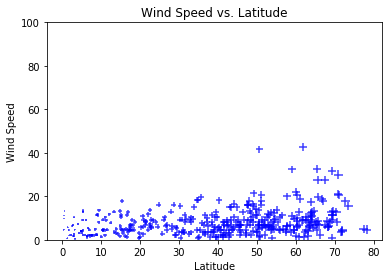

In [35]:
plt.scatter(citiesWeatherDF.lat, citiesWeatherDF.windSpeed, marker="+", facecolors="blue", edgecolors="black",
            s=citiesWeatherDF.lat, alpha=0.75)
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(0,100)
plt.savefig(r'C:\Users\Owner\BootCampData\python-api-challenge\VacationPy\Output\LatvWind.png')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression